# Ruina gracza
Proszę wykonać poprzednie zadania 1, 2, 3, 6 nie dla dwu graczy, ale dla kilku, np. 5, dla kilku różnych wartości $p_i$ (będzie wymagane ustalenie więcej niż jednego prawdopodobieństwa) przy sugerowanych kapitałach początkowych $a_i$ = 20.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2

In [2]:
def single_game(players_fortune, players_probs):   
    if len(players_fortune) != len(players_probs):
        print("Players number not equal probs number")
        return
        
    while np.sum([x > 0 for x in players_fortune]) > 1:
        random = np.random.uniform(0, 1)
        section = 0

        for i, p in enumerate(players_probs):
            if players_fortune[i] == 0:
                continue
                
            section += p
            if random <= section:
                losers_prob = 0
                
                for fortune_index in range(len(players_fortune)):
                    if i != fortune_index and players_fortune[fortune_index] != 0:
                        players_fortune[fortune_index] -= 1
                        players_fortune[i] += 1
                        
                        if players_fortune[fortune_index] == 0:
                            losers_prob += players_probs[fortune_index]
                            players_probs[fortune_index] = 0
                    
                if losers_prob > 0:
                    new_prob = losers_prob / np.sum([x > 0 for x in players_probs])
                    for prob_index in range(len(players_probs)):
                        if players_probs[prob_index] != 0:
                            players_probs[prob_index] += new_prob
                break
                                    
    return [x > 0 for x in players_fortune]

In [3]:
def simulation(game_num, players_fortune, players_probs):
    wins = np.zeros(len(players_fortune))
    
    for i in range(game_num):
        wins += single_game(players_fortune.copy(), players_probs.copy())
        
    return (game_num - wins) / game_num

In [4]:
game_num = 250
players_num = 5
first_player_fortunes = np.arange(1, 100 - players_num, 2)
players_probs = [1 / players_num for _ in range(players_num)]

In [5]:
results = []
for first_player_fortune in first_player_fortunes:
    players_fortune = [first_player_fortune]    
    other_players_fortune = (100 - first_player_fortune) // (players_num - 1)
    
    for i in range(players_num - 1):
           players_fortune.append(other_players_fortune)
            
    players_fortune[-1] += 100 - np.sum(players_fortune)
    results.append(simulation(game_num, players_fortune, players_probs))

results = np.array(results)

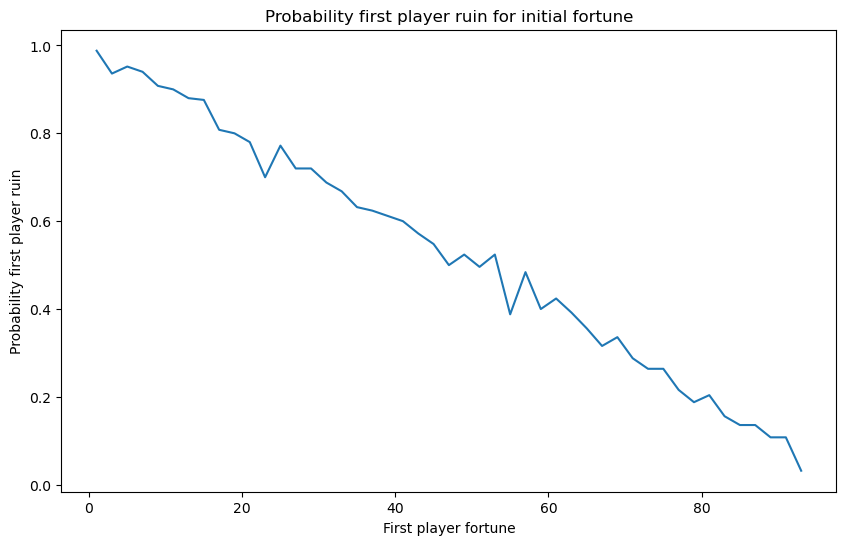

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(first_player_fortunes, results[:, 0])
plt.xlabel('First player fortune')
plt.ylabel('Probability first player ruin')
plt.title(f'Probability first player ruin for initial fortune')
plt.show()